#Traffic Sign Recognition Using CNN on GTSRB Dataset

Traffic Sign Recognition using GTSRB (German Traffic Sign Recognition Benchmark) is a real-world, image classification problem and a classic application of Convolutional Neural Networks (CNNs)

##Real-Time Use Case
Traffic Sign Recognition is used in:
* Autonomous vehicles (Tesla, Waymo): Identifying road signs to make driving decisions
* ADAS (Advanced Driver Assistance Systems): Alerting drivers to speed limits, stops, warnings
* Smart traffic systems: Detecting sign compliance via cameras

##Project Pipeline
| Step               | Description                          |
| ------------------ | ------------------------------------ |
| 1. Dataset         | Load & explore GTSRB                 |
| 2. Preprocessing   | Resize, normalize, encode labels     |
| 3. Model           | Build CNN using TensorFlow/Keras     |
| 4. Training        | Use validation and tuning            |
| 5. Evaluation      | Accuracy, confusion matrix           |
| 6. Deployment Idea | Could be converted to web/mobile app |

##Dataset: GTSRB
* 43 traffic sign classes (Stop, Yield, Speed Limits, etc.)
* Over 50,000 labeled images
* Download from: https://benchmark.ini.rub.de/gtsrb_news.html or use preprocessed version via Kaggle.



In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import kagglehub


In [ ]:

# Download latest version
DATA_PATH = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")
print(DATA_PATH)

data = []
labels = []
IMG_HEIGHT = 32
IMG_WIDTH = 32
NUM_CLASSES = 43
DATA_PATH = DATA_PATH + "/Train"
#This is the folder where the training images are located. Each subfolder corresponds to a class (like 0, 1, ..., 42).

for class_id in range(NUM_CLASSES): #This loop iterates over each class folder (0, 1, ..., 42).
    path = os.path.join(DATA_PATH, str(class_id)) #So for class_id = 0, it will look into GTSRB/Train/0, for class_id = 1, into GTSRB/Train/1, and so on.
    for img in os.listdir(path): #Iterates over all image files in that class folder
        try:
            image = cv2.imread(os.path.join(path, img))
            image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
            data.append(image)
            labels.append(class_id)
        except:
            pass


# Convert to numpy arrays
#Converts both data and labels lists into NumPy arrays.
#CNN models (like in TensorFlow or PyTorch) expect NumPy arrays as input.

data = np.array(data)
labels = np.array(labels)


Using Colab cache for faster access to the 'gtsrb-german-traffic-sign' dataset.
/kaggle/input/gtsrb-german-traffic-sign


In [ ]:
#Normalize & One-Hot Encode
'''
Why normalize?
CNNs train faster and more efficiently when input data is in a small, consistent range.
Helps stabilize gradients and improves model performance.
Prevents any one feature (or pixel) from dominating just because it has a higher value.
'''

data = data / 255.0  # Normalization


'''
What is One-Hot Encoding? - It transforms a class label into a vector of 0s and one 1

 - It's required for multi-class classification in neural networks.
 - Works with loss functions like categorical crossentropy.
 - Prevents the model from assuming any ordinal relationship between labels (e.g., that 2 is “greater” than 1).
'''

labels = to_categorical(labels, NUM_CLASSES)

X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
#CNN Model Building
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
'''
Loss Function in Deep Learning
 - It tells us how wrong our model’s predictions are.
 - How far is the predicted output from the actual output?

Every time our model makes a prediction (like recognizing a traffic sign or predicting house price),
the loss function compares that prediction to the real answer and gives us a number — the loss.

Why Do We Need a Loss Function?
We need a way to measure error so the model can learn.
Without a loss function, the model wouldn’t know how to adjust its weights during training (via backpropagation and gradient descent)

Categorical Cross-Entropy – Used for Multi-Class Classification
'''

model.summary()
'''
(kernel height × width × input channels + bias) × number of filters
(3×3×3+1)×32=896

Output size= ⌊(W − F + 2P)/S⌋ + 1
⌊(32 − 3 + 2x0)/1⌋ + 1 = 30
W = Input size (width or height)
F = Filter size (kernel size)
P = Padding
S = Stride (how many pixels the filter moves at a time)
⌊⋅⌋ = floor (round down)

(None, 30, 30, 32)
batch size placeholder, height and width of the output feature map, number of filters
'''

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620,523 (2.37 MB)

 Trainable params: 620,523 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

'\n(kernel height × width × input channels + bias) × number of filters\n(3×3×3+1)×32=896\n\nOutput\xa0size= ⌊(W − F + 2P)/S⌋ + 1\n⌊(32 − 3 + 2x0)/1⌋ + 1 = 30\nW = Input size (width or height)\nF = Filter size (kernel size)\nP = Padding\nS = Stride (how many pixels the filter moves at a time)\n⌊⋅⌋ = floor (round down)\n\n(None, 30, 30, 32)\nbatch size placeholder, height and width of the output feature map, number of filters\n'

In [ ]:
#Training the Model

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), batch_size=64)

'''
During Training:
Pass your training data through the network
Calculate the loss (error)
Use backpropagation to adjust the weights
Repeat for multiple epochs
'''


Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 45s 88ms/step - accuracy: 0.3536 - loss: 2.4204 - val_accuracy: 0.9087 - val_loss: 0.3909
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 44s 89ms/step - accuracy: 0.8658 - loss: 0.4430 - val_accuracy: 0.9661 - val_loss: 0.1551
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.9363 - loss: 0.2167 - val_accuracy: 0.9819 - val_loss: 0.0859
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 83s 89ms/step - accuracy: 0.9596 - loss: 0.1355 - val_accuracy: 0.9847 - val_loss: 0.0693
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.9695 - loss: 0.0986 - val_accuracy: 0.9866 - val_loss: 0.0565
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 85s 94ms/step - accuracy: 0.9750 - loss: 0.0841 - val_accuracy: 0.9906 - val_loss: 0.0431
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.9798 - loss: 0.0669 - val_accuracy: 0.9934 - val_loss: 0.0331
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 44s 89ms/step - accuracy: 0.9843 - loss: 0.0554 - 

'\nDuring Training:\nPass your training data through the network\nCalculate the loss (error)\nUse backpropagation to adjust the weights\nRepeat for multiple epochs\n'

In [ ]:
#Evaluate Performance
# Accuracy
test_loss, test_acc = model.evaluate(X_val, y_val)
print("Validation Accuracy:", test_acc)

# Confusion Matrix
y_pred = model.predict(X_val)
#This runs the model to get predicted probabilities for each class on all X_val images

y_pred_classes = np.argmax(y_pred, axis=1)
#Converts each prediction from probabilities to actual predicted class label
#np.argmax() picks the index of the highest probability, i.e., the predicted class.

y_true = np.argmax(y_val, axis=1)
#y_val is one-hot encoded, This line converts it back to actual class labels for comparison.


print(classification_report(y_true, y_pred_classes))


246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9944 - loss: 0.0246
Validation Accuracy: 0.9933690428733826
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       0.99      0.99      0.99       496
           2       0.99      0.99      0.99       450
           3       0.99      0.99      0.99       280
           4       1.00      1.00      1.00       418
           5       0.99      0.98      0.98       364
           6       1.00      1.00      1.00        59
           7       0.99      0.99      0.99       278
           8       0.99      0.98      0.98       301
           9       1.00      1.00      1.00       268
          10       1.00      1.00      1.00       370
          11       1.00      1.00      1.00       236
          12       1.00      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       1.00      0.

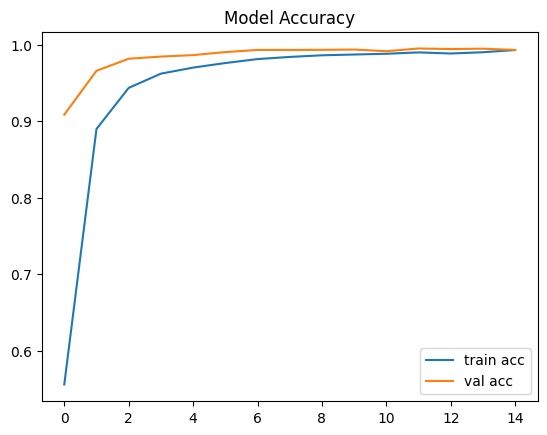

In [ ]:
#Plot Accuracy and Loss

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Model Accuracy")
plt.show()



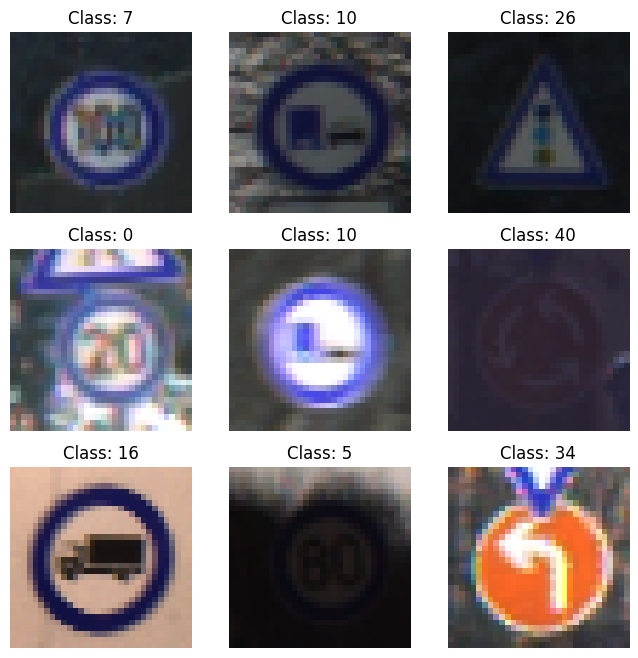

In [ ]:
import random
# Pick 9 random indices
indices = random.sample(range(len(data)), 9)

plt.figure(figsize=(8,8))
for i, idx in enumerate(indices):
    plt.subplot(3,3,i+1)
    plt.imshow(data[idx])  # image is normalized, so it will display fine
    plt.title(f"Class: {np.argmax(labels[idx])}")
    plt.axis('off')
plt.show()

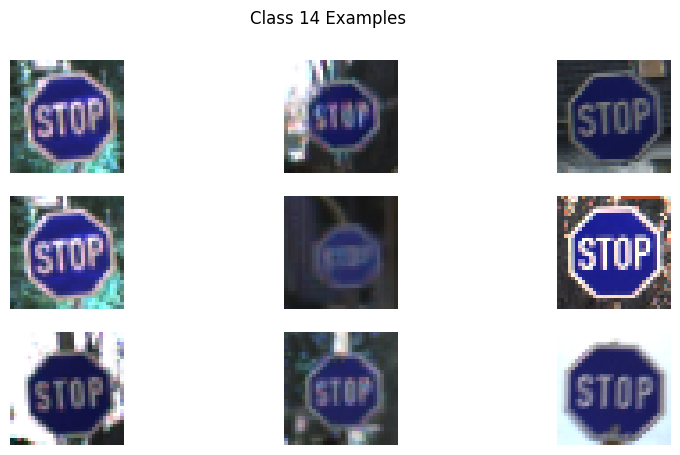

In [ ]:
class_id = 14  # example class
class_indices = np.where(np.argmax(labels, axis=1) == class_id)[0]

plt.figure(figsize=(10,5))
for i, idx in enumerate(class_indices[:9]):  # show first 9 images of this class
    plt.subplot(3,3,i+1)
    plt.imshow(data[idx])
    plt.axis('off')
plt.suptitle(f"Class {class_id} Examples")
plt.show()

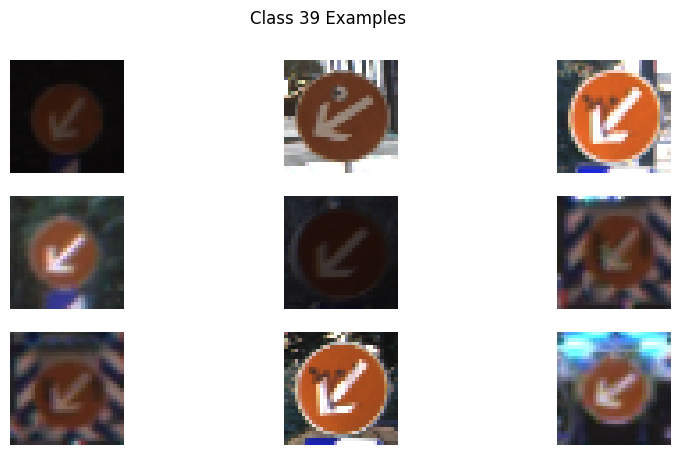

In [ ]:
class_id = 39  # example class
class_indices = np.where(np.argmax(labels, axis=1) == class_id)[0]

plt.figure(figsize=(10,5))
for i, idx in enumerate(class_indices[:9]):  # show first 9 images of this class
    plt.subplot(3,3,i+1)
    plt.imshow(data[idx])
    plt.axis('off')
plt.suptitle(f"Class {class_id} Examples")
plt.show()

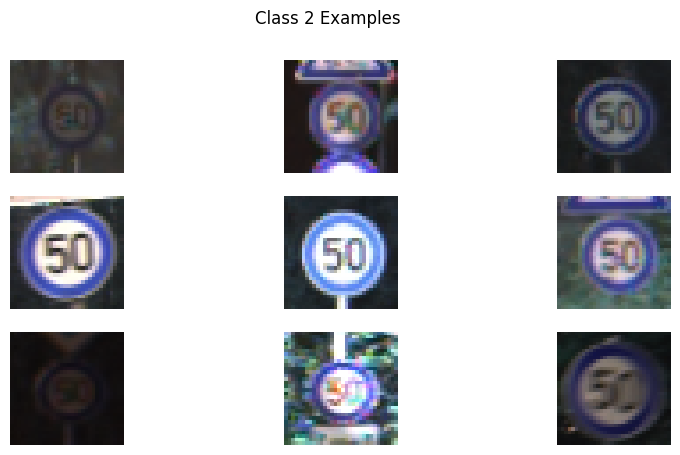

In [ ]:
class_id = 2  # example class
class_indices = np.where(np.argmax(labels, axis=1) == class_id)[0]

plt.figure(figsize=(10,5))
for i, idx in enumerate(class_indices[:9]):  # show first 9 images of this class
    plt.subplot(3,3,i+1)
    plt.imshow(data[idx])
    plt.axis('off')
plt.suptitle(f"Class {class_id} Examples")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


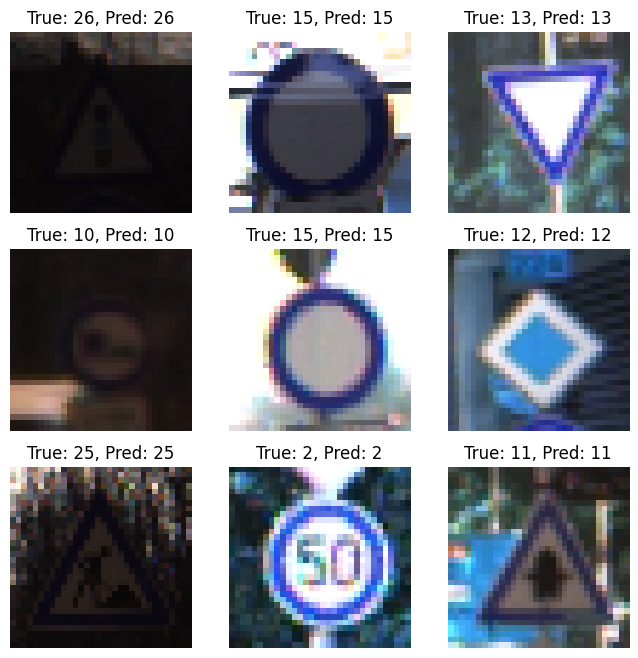

In [ ]:
y_pred = model.predict(X_val[:9])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val[:9], axis=1)

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_val[i])
    plt.title(f"True: {y_true[i]}, Pred: {y_pred_classes[i]}")
    plt.axis('off')
plt.show()

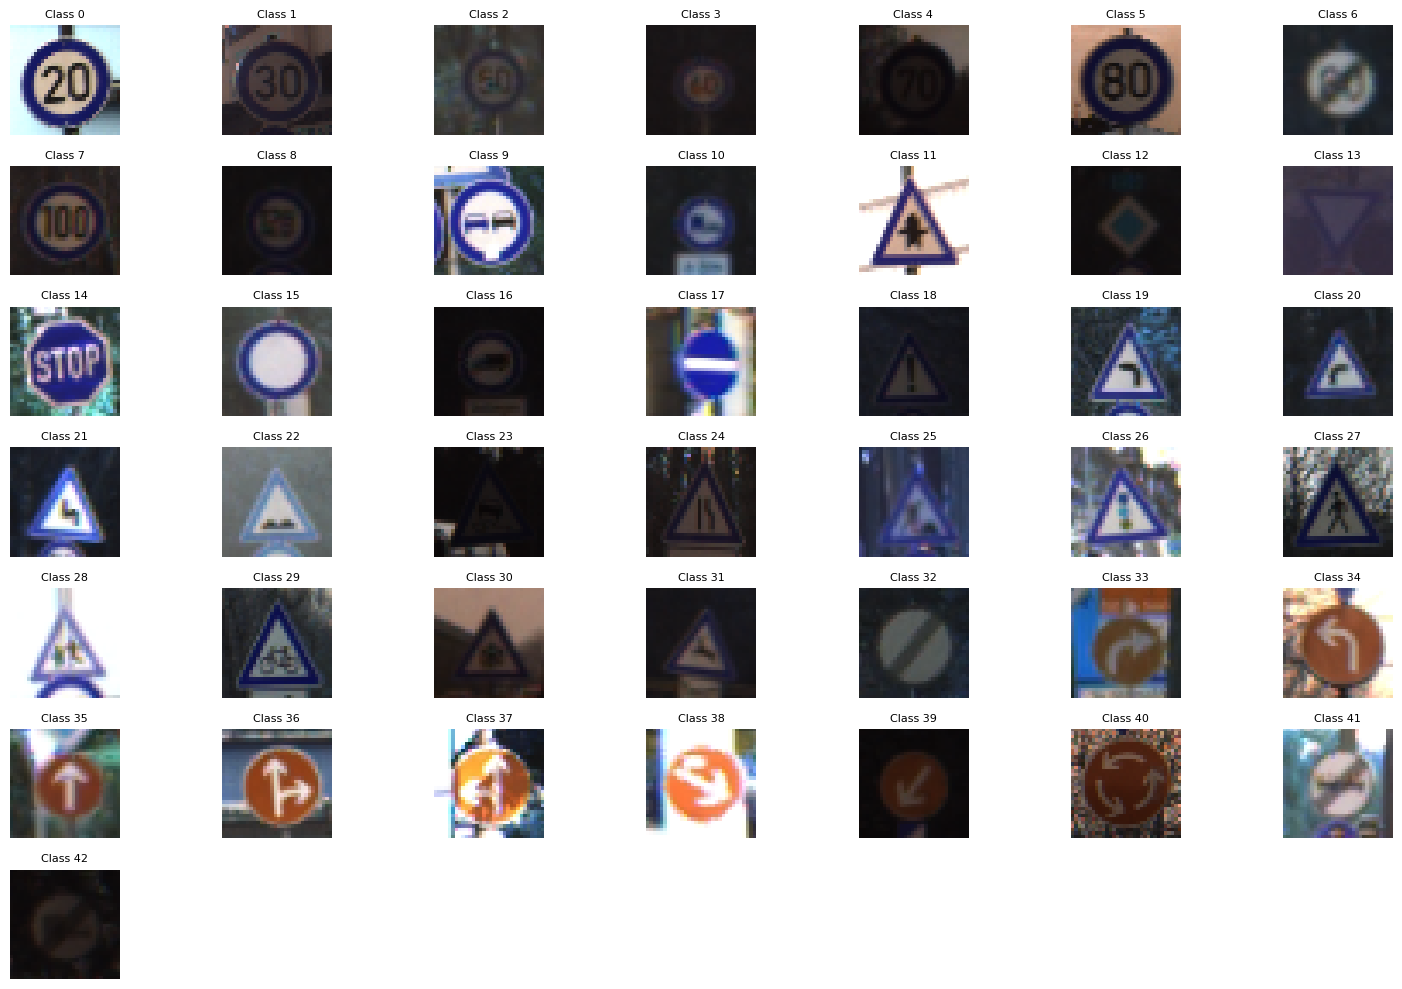

In [ ]:
plt.figure(figsize=(15, 10))

for class_id in range(NUM_CLASSES):
    # Find the first image of this class
    idx = np.where(np.argmax(labels, axis=1) == class_id)[0][0]
    plt.subplot(7, 7, class_id+1)  # 7x7 grid (fits 43 classes nicely)
    plt.imshow(data[idx])
    plt.title(f"Class {class_id}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
class_names = [
    'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 50', 'Speed Limit 60',
    'Speed Limit 70', 'Speed Limit 80', 'End of Speed Limit 80', 'Speed Limit 100',
    'Speed Limit 120', 'No passing', 'No passing for vehicles over 3.5 tons',
    'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop',
    'No vehicles', 'Vehicles over 3.5 tons prohibited', 'No entry', 'General caution',
    'Dangerous curve left', 'Dangerous curve right', 'Double curve', 'Bumpy road',
    'Slippery road', 'Road narrows', 'Construction', 'Traffic signal', 'Pedestrians',
    'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing',
    'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead',
    'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right',
    'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 tons'
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


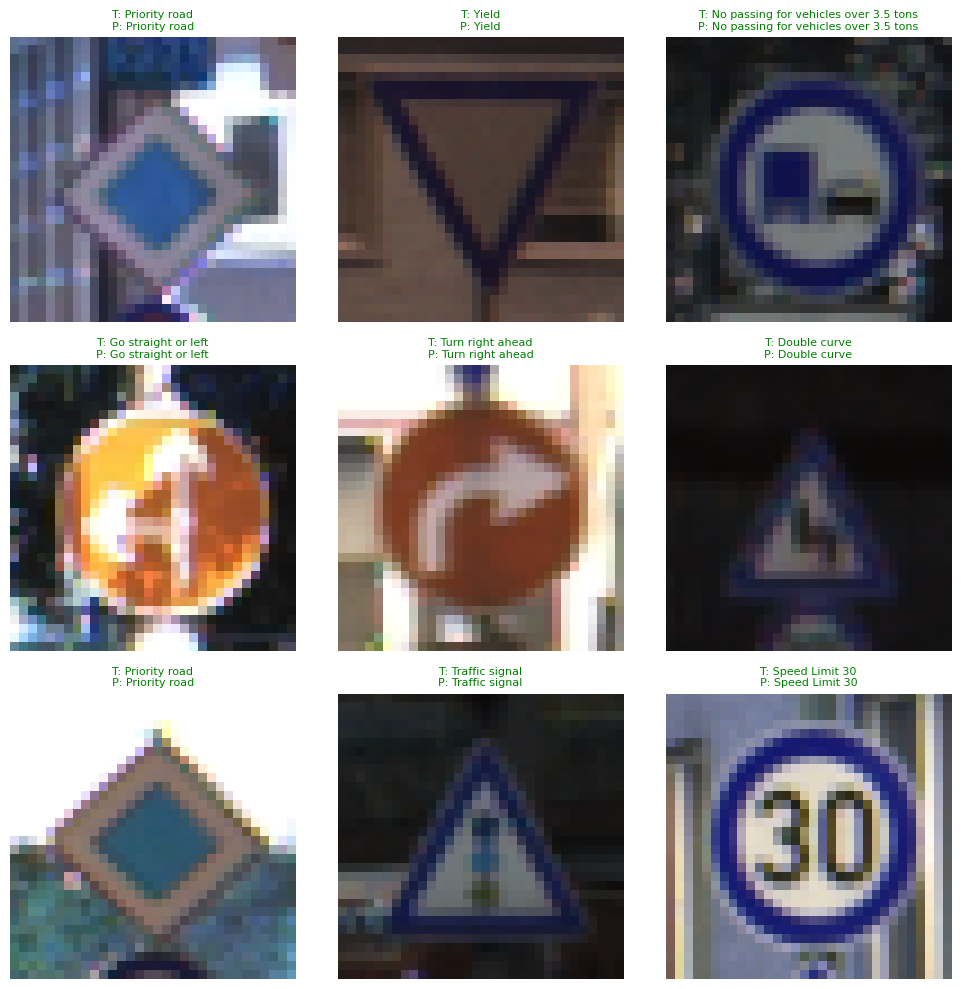

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Number of random images to display
num_images = 9

# Randomly select indices from validation set
indices = random.sample(range(len(X_val)), num_images)

plt.figure(figsize=(10,10))

for i, idx in enumerate(indices):
    image = X_val[idx]
    true_class = np.argmax(y_val[idx])
    pred_class = np.argmax(model.predict(image[np.newaxis, ...])[0])

    plt.subplot(3, 3, i+1)
    plt.imshow(image)

    # True vs Predicted labels
    true_label = class_names[true_class]
    pred_label = class_names[pred_class]

    color = "green" if true_class == pred_class else "red"
    plt.title(f"T: {true_label}\nP: {pred_label}", color=color, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()
